In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

### Import 

In [3]:
path = r"C:\Users\andre\OneDrive\Desktop\Personal\Data Science\Training\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection"
messages = pd.read_csv(path, sep="\t", names= ["label", "sms"])

In [4]:
messages ["length"] = messages["sms"].apply(len )

In [5]:
messages.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Bag of words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
CV = CountVectorizer()

In [8]:
CV.fit("This is a test sentence".split())

CountVectorizer()

In [9]:
CV.get_feature_names()

['is', 'sentence', 'test', 'this']

In [10]:
out = CV.transform("This is a test sentence".split())

In [11]:
print(out)

  (0, 3)	1
  (1, 0)	1
  (3, 2)	1
  (4, 1)	1


In [12]:
out.get_shape()

(5, 4)

In [13]:
out.nnz

4

##### on messages

In [14]:
bagofwords= CountVectorizer()

In [15]:
out = bagofwords.fit_transform(messages["sms"])

In [16]:
out.get_shape()

(5572, 8713)

## Tf-idf

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf_instance = TfidfVectorizer()

In [21]:
tfidf = tfidf_instance.fit_transform(messages["sms"])

In [22]:
print(tfidf[4])

  (0, 7729)	0.3032095165143356
  (0, 3856)	0.23190656992160968
  (0, 1220)	0.26812420703039713
  (0, 4692)	0.3862095216219033
  (0, 8130)	0.3440309062672948
  (0, 3579)	0.3067799143124677
  (0, 3805)	0.4315037813628345
  (0, 7709)	0.22923989517841997
  (0, 2724)	0.22266780078255793
  (0, 5270)	0.3482229684677259
  (0, 7806)	0.10572198681883993


In [23]:
print(tfidf.get_shape())

(5572, 8713)


### Train test split 

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [40]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, messages["label"], test_size=0.33, random_state=42)

# Naive Bayes 

In [41]:
from sklearn.naive_bayes import MultinomialNB 

In [42]:
NB = MultinomialNB()

In [43]:
NB.fit(tfidf,messages["label"])

MultinomialNB()

### Evaluate model quicly

In [45]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1593
        spam       1.00      0.84      0.91       246

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



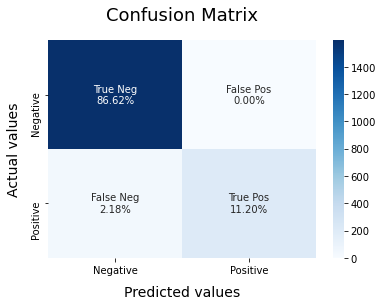

In [46]:
model_Evaluate(NB)